In [1]:
using Pkg
Pkg.activate(".")
using Plots

  Activating project at `~/Research/SurrogateDistanceModels/notebooks`


In [2]:
struct LogisticFunction
    scale::Float64
end

@inline logistic(lfun::LogisticFunction, x) = 1 / (1 + exp(-lfun.scale * x))

function smooth_topk(lfun::LogisticFunction, X::AbstractVector, t)
    s = 0.0
    @inbounds @simd for x in X
        s += logistic(lfun, x + t)
    end
    
    s
end

function binsearch_optim_topk(lfun::LogisticFunction, X, k::Float64; tol=1e-1, maxiters=64)
    low, high = -1e6, 1e6 # extrema(X)
    
    iter = 0
    t = 0.0
    
	while low < high
        t = 0.5 * (low + high)
        h = smooth_topk(lfun, X, t)
        # @show k, h, iter, t, low, high
        abs(k - h) <= tol && break
        if k < h
            high = t
        else
            low = t
        end
        
        iter += 1
        iter == maxiters && break
	end
	
    t
end

binsearch_optim_topk (generic function with 1 method)

In [3]:
X = rand(50);

In [4]:
lfun = LogisticFunction(8)
t = binsearch_optim_topk(lfun, X, 5.0)
smooth_topk(lfun, X, t)

4.926790389983167

In [5]:
L = logistic.((lfun,), X .+ t)
@show X
@show L
sum(L .> 0.4)

X = [0.6071493138537929, 0.9117556140273377, 0.3271726046157942, 0.6574206217815375, 0.229876862975242, 0.34365227887358196, 0.70282830074645, 0.15978964768321835, 0.4559447362154555, 0.9682317102837587, 0.4704085950606798, 0.8817479818871865, 0.49895154362478533, 0.6077798603807706, 0.6732519273163566, 0.8288881351004552, 0.4567249049581805, 0.4999395842069605, 0.3416023711269749, 0.9917427005225099, 0.15022248751257006, 0.6607909482215406, 0.7728360059995752, 0.3576810320668655, 0.12350749847735354, 0.08164539914978763, 0.27010528082054, 0.531615403484348, 0.2946699454619499, 0.7953440520810696, 0.6855848985292994, 0.9827979660290608, 0.015191798101825027, 0.0044023603182302695, 0.9451694999545188, 0.29015852993482594, 0.05620134471351179, 0.9213583235453212, 0.5674336768794443, 0.9242054765820195, 0.4761976201284691, 0.48838574876203966, 0.5537038421011139, 0.7013576008133491, 0.7286230672728204, 0.422744793365206, 0.1449028293104434, 0.9313759696279788, 0.22363021710966025, 0.98938

4

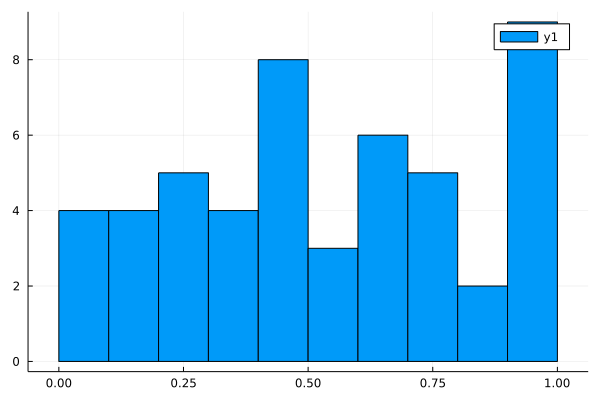

In [6]:
histogram(X, bins=10)

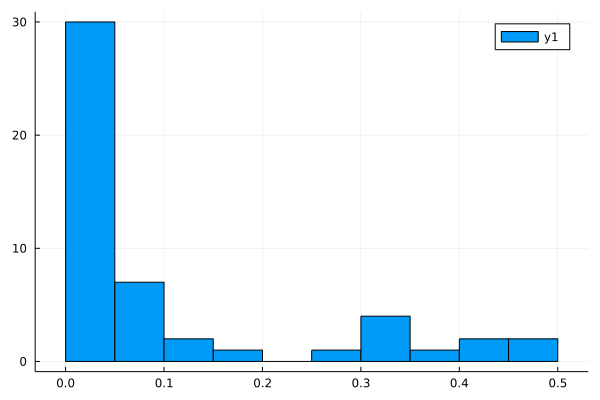

In [7]:
histogram(L, bins=10)